# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_Anna.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
#Create dataframe to make sure I am pulling cities into the list
weather_df = pd.DataFrame(
    {
        'City': cities,
        'Lat': "",
        'Lng': "",
        'Max Temp': "", 
        'Humidity': "", 
        'Cloudiness': "", 
        'Wind Speed': "", 
        'Country': "", 
        'Date': ""
    })
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,,,,,,,,
1,atuona,,,,,,,,
2,punta arenas,,,,,,,,
3,iqaluit,,,,,,,,
4,bachaquero,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Loop to add info into dataframe, start with print command
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

#Iterate through the dataframe and store info
for index, row in weather_df.iterrows():
    
    #Create URL with my API key
    base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
    query_url = base_url + row['City'] + ',' + '&APPID=' + weather_api_key

    #Call API
    response = requests.get(query_url).json()
    
    try:
        #Error message if city not found
        print(f'Processing Weather Data for Record {response["name"]}')
        
        #Store data in dataframe
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
   
    except (KeyError, IndexError):
        print("City not found...Skipping.")

#API complete statement
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')




-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record Chokurdakh
Processing Weather Data for Record Atuona
Processing Weather Data for Record Punta Arenas
Processing Weather Data for Record Iqaluit
Processing Weather Data for Record Bachaquero
Processing Weather Data for Record Port Alfred
Processing Weather Data for Record Albany
Processing Weather Data for Record Izhma
Processing Weather Data for Record Sorong
Processing Weather Data for Record Baruun-Urt
Processing Weather Data for Record Clyde River
Processing Weather Data for Record Honiara
Processing Weather Data for Record Kapaa
Processing Weather Data for Record Miles City
Processing Weather Data for Record Tura
Processing Weather Data for Record Ulladulla
Processing Weather Data for Record Coyhaique
Processing Weather Data for Record Busselton
Processing Weather Data for Record Prainha
Processing Weather Data for Record Woodward
Processing Weather Data for Reco

Processing Weather Data for Record Honningsvåg
Processing Weather Data for Record Yar-Sale
Processing Weather Data for Record Cayenne
Processing Weather Data for Record Tianpeng
Processing Weather Data for Record Waghāi
Processing Weather Data for Record Tilichiki
Processing Weather Data for Record Rocha
Processing Weather Data for Record Anadyr
Processing Weather Data for Record Bintulu
Processing Weather Data for Record Claremore
Processing Weather Data for Record Tessalit
Processing Weather Data for Record Matelica
Processing Weather Data for Record Kavaratti
Processing Weather Data for Record Safi
Processing Weather Data for Record Vaitape
Processing Weather Data for Record Antofagasta
Processing Weather Data for Record Port Elizabeth
Processing Weather Data for Record Nishihara
Processing Weather Data for Record Bethel
Processing Weather Data for Record Narón
Processing Weather Data for Record La Ronge
Processing Weather Data for Record Bengbu
Processing Weather Data for Record In

Processing Weather Data for Record Rafai
Processing Weather Data for Record Klaksvík
Processing Weather Data for Record Rome
Processing Weather Data for Record Sistranda
Processing Weather Data for Record Portland
Processing Weather Data for Record Broken Hill
Processing Weather Data for Record Morón
Processing Weather Data for Record Port Hedland
Processing Weather Data for Record Tavda
Processing Weather Data for Record Gizo Government Station
Processing Weather Data for Record Te Anau
Processing Weather Data for Record Srednekolymsk
Processing Weather Data for Record Merauke
Processing Weather Data for Record Rawson
Processing Weather Data for Record Harrison
Processing Weather Data for Record Zhukovka
Processing Weather Data for Record Cam Ranh
Processing Weather Data for Record Nacala
Processing Weather Data for Record Acarí
Processing Weather Data for Record Linfen
Processing Weather Data for Record Shellbrook
Processing Weather Data for Record Pacifica
Processing Weather Data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# #Remove cities / clean datafrane
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()

#Preview to make sure it's working
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.63,147.92,6.91,95,100,6.42,RU,1604083875
1,atuona,-9.8,-139.03,77.41,73,100,12.73,PF,1604083876
2,punta arenas,-53.15,-70.92,55.40,62,75,33.33,CL,1604083818
3,iqaluit,63.75,-68.51,3.20,65,20,5.82,CA,1604083974
4,bachaquero,9.97,-71.15,87.98,60,76,5.46,VE,1604083994


In [ ]:
# #Output data to csv file
weather_df.to_csv("weather_df.csv", index=False, header=True)

In [17]:
weather_df.describe(include='all')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,545,545.00,545.00,545.000000,545.0,545.0,545.00,545,5.450000e+02
unique,545,532.00,543.00,NaN,85.0,75.0,269.00,108,2.760000e+02
top,ushuaia,-28.87,-151.75,NaN,93.0,0.0,9.17,RU,1.604084e+09
freq,1,2.00,2.00,NaN,23.0,117.0,24.00,72,5.000000e+00
mean,NaN,NaN,NaN,57.797119,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,23.551814,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-15.360000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,77.000000,NaN,NaN,NaN,NaN,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

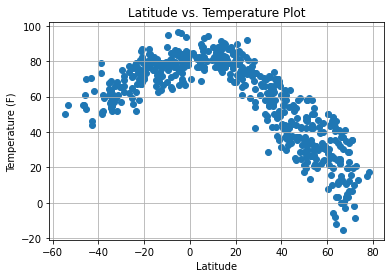

In [18]:
#Plot scatter
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o")
plt.title(f"Latitude vs. Temperature Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

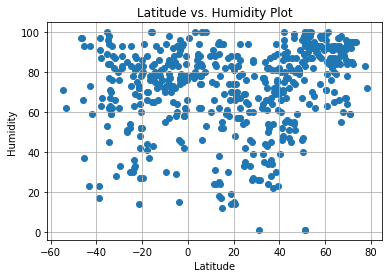

In [19]:
#Plot scatter
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o")
plt.title(f"Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

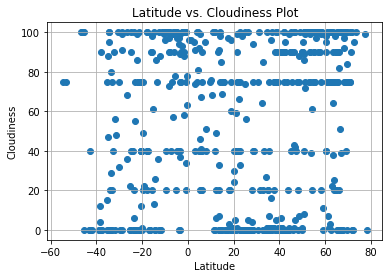

In [20]:
#Plot scatter
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o")
plt.title(f"Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

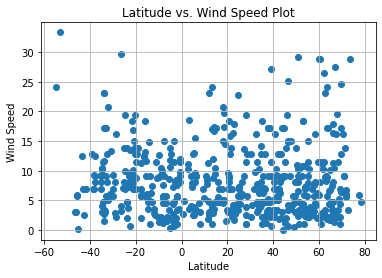

In [21]:
#Plot scatter
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o")
plt.title(f"Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [22]:
# Create northern and southern dataframes
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# Add the linear regression equation and line to plot
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {regress_values}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression